In [1]:
## Basic Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import joblib  
%matplotlib inline

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [3]:
## Import data from Kaggle

# Set the Kaggle config directory to the folder containing your kaggle.json file
os.environ['KAGGLE_CONFIG_DIR'] = 'C:/Users/Ifelo/.kaggle'

# Continue with Kaggle API calls
import kaggle

# Replace 'dataset-name' and 'owner-name' with your desired dataset and owner's username.
kaggle.api.dataset_download_files('arshid/iris-flower-dataset', path='./', unzip=True)

In [4]:
# List files in the current directory to confirm the downloaded dataset
files_in_directory = os.listdir('.')
print(files_in_directory)

['.ipynb_checkpoints', 'app.py', 'IMDb Movies India.csv', 'imdb-india-movies.zip', 'Iris Flower Classification.ipynb', 'IRIS.csv', 'knn_model.pkl', 'Movie Rating Prediction.ipynb', 'Titanic Survival Prediction.ipynb', 'Titanic-Dataset.csv']


In [5]:
# Load a CSV file from the downloaded dataset
df = pd.read_csv('IRIS.csv')

In [8]:
## Data Exploration
print("Shape of the dataset:", df.shape)  # Show the number of rows and columns
print("\nColumns in the dataset:", df.columns)  # Display column names
print("\nData types of columns:")
print(df.dtypes)  # Show the data types of each column
print("\nSummary statistics:")
print(df.describe())  # Show summary statistics (mean, std, min, max, etc.) for numerical columns
print("\nFirst few rows of the dataset:")
print(df.head())  # Display the first few rows of the dataset
print("\nLast few rows of the dataset:")
print(df.tail())  # Display the last few rows of the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())  # Show the count of missing values in each column
print("Target Labels", df["species"].unique())

Shape of the dataset: (150, 5)

Columns in the dataset: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Data types of columns:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.

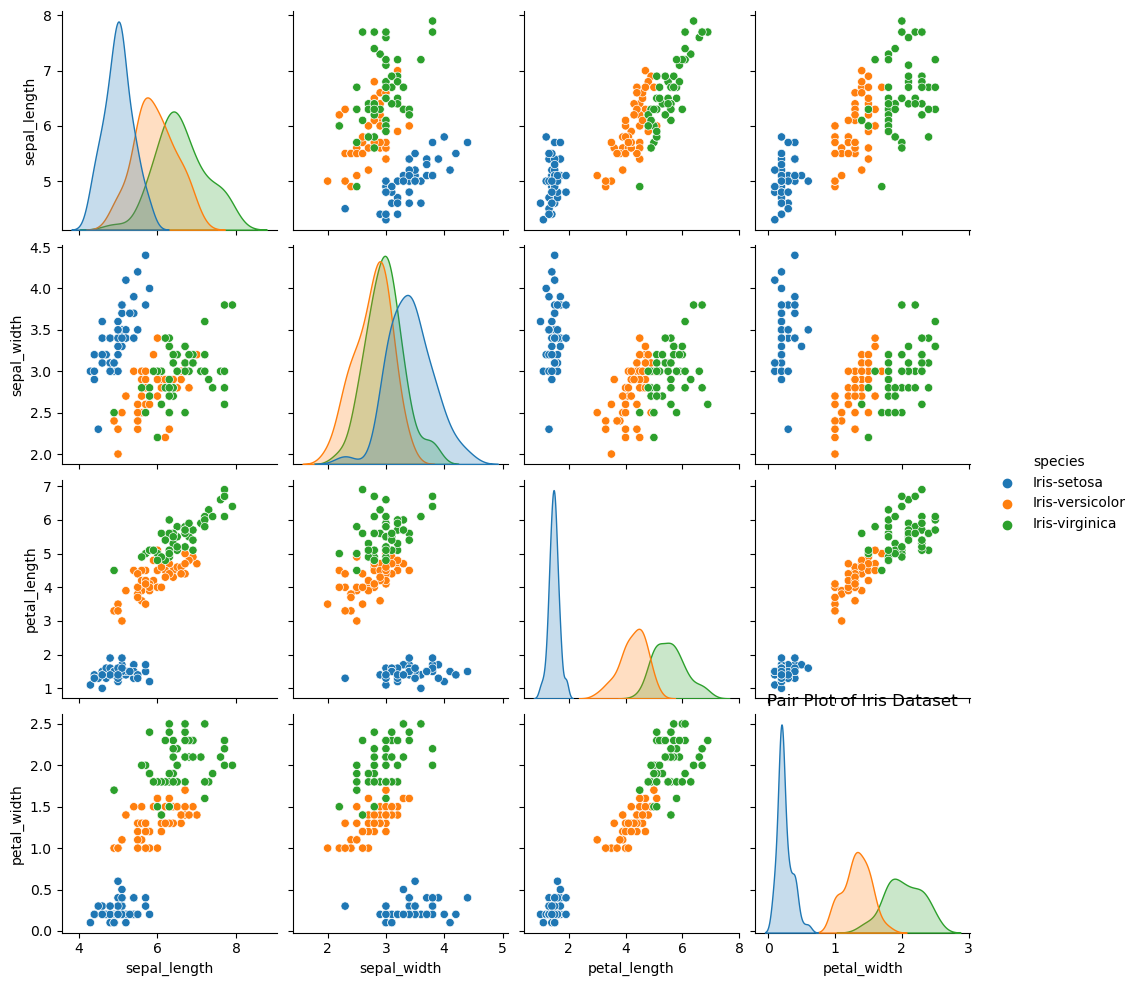

In [10]:
# Pair plot to visualize pairwise relationships in the dataset
sns.pairplot(df, hue='species')
plt.title('Pair Plot of Iris Dataset')
plt.show()

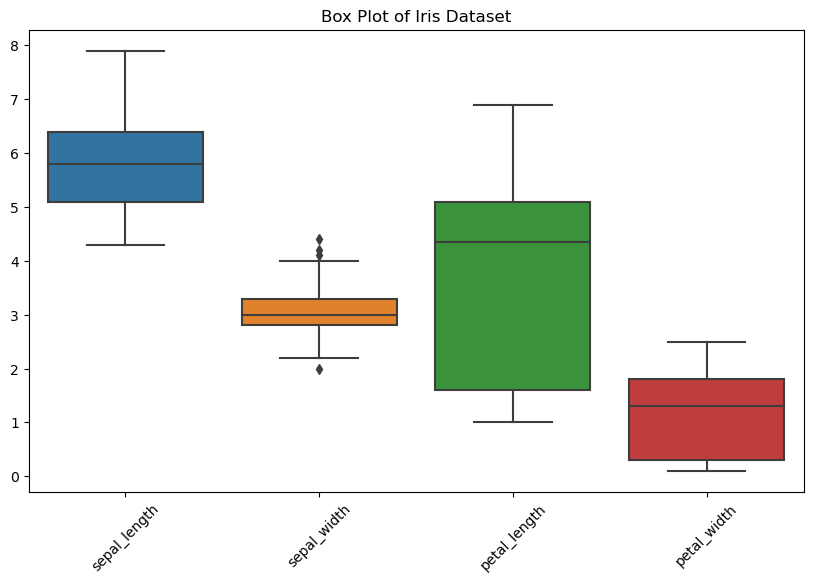

In [11]:
# Box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Iris Dataset')
plt.xticks(rotation=45)
plt.show()

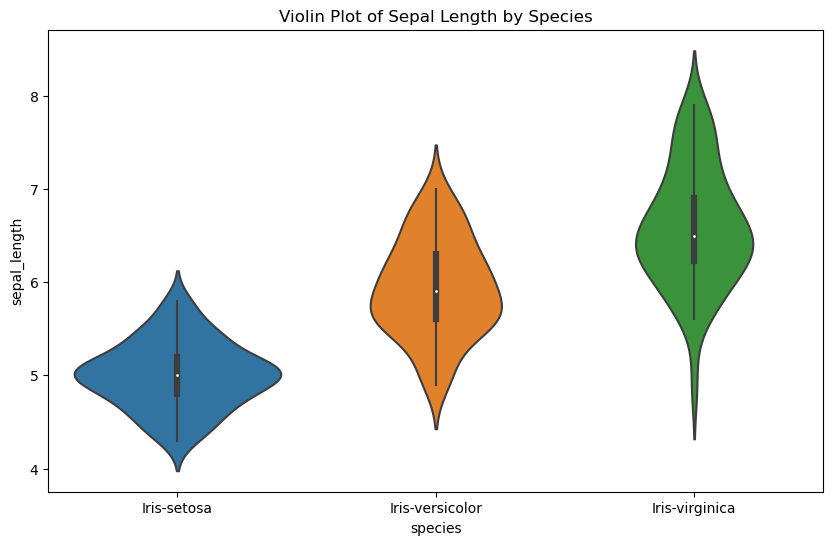

In [12]:
# Violin plot to show the distribution of each feature
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

In [13]:
# Define feature and target variable
x = df.drop("species", axis=1)
y = df["species"]

In [14]:
# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [15]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Predict on the test set
y_pred = knn.predict(x_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\Ifelo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The performance metrics of a machine learning model trained on the Iris dataset using the K-Nearest Neighbors (KNN) algorithm. The dataset comprises measurements of iris flowers, specifically their sepal length, sepal width, petal length, and petal width, alongside the respective species they belong to—setosa, versicolor, or virginica.

Precision, Recall, and F1-Score
The precision metric indicates the accuracy of the positive predictions made by the model for each class. A precision score of 1.00 implies that all the predictions made for a particular class were indeed correct. The recall metric measures the model's ability to identify all relevant instances of a class in the dataset. Again, a score of 1.00 signifies that the model successfully captured all instances of each class. The F1-score, a harmonic mean of precision and recall, also achieves a perfect score of 1.00 for each class, indicating a harmonious balance between precision and recall.

Accuracy
The overall accuracy of the model, which is also perfect at 1.00, signifies the proportion of correctly predicted instances out of the total number of instances in the test set. An accuracy score of 1.00 means that the model made no incorrect predictions on the test data.

Implications
The exceptional performance metrics—perfect precision, recall, F1-score, and accuracy—suggest that the KNN model learned the patterns within the Iris dataset very accurately. It was able to distinguish between the three classes (setosa, versicolor, and virginica) with remarkable precision, capturing all instances of each class and making no incorrect predictions.

Conclusion
In summary, the KNN model demonstrated an exemplary understanding of the Iris dataset, achieving flawless predictions across all classes. However, it's essential to consider the possibility of overfitting, especially when a model performs exceptionally well on a specific dataset. Further evaluation on unseen data or employing cross-validation techniques could help validate the model's robustness and generalization to new data. Nonetheless, based on these results, the KNN model appears to be well-suited for this classification task on the Iris dataset.

In [18]:
# Save the trained model to a file
joblib.dump(knn, 'iris_model_filename.pkl')

['iris_model_filename.pkl']

In [19]:
# Load the model from the file
model = joblib.load('iris_model_filename.pkl')

In [20]:
# Assuming 'model' is your trained machine learning model
predictions = model.predict(x_test)

C:\Users\Ifelo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
# Save predictions to a CSV file
output = pd.DataFrame({'Predictions': predictions})
output.to_csv('iris_predictions.csv', index=False)

In [22]:
# Ramdom test
x_new = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


C:\Users\Ifelo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ifelo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
# Ramdom test
x_new = np.array([[7, 3.2, 4.7, 1.4]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-versicolor']


C:\Users\Ifelo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ifelo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
